# **Final Project**
*Supervised Learning - AY 2021-2022 - January 12th 2022*

The goal of this project is to analyze a dataset representing potential audience people for an advertising campaign. We want to build a model which is able to classify all people (potential audience) into 4 segments (A, B, C, D), in order to perform personalized advertising. The provided dataset includes the following information: 

* ID: Unique ID
* Gender: Gender of the customer
* Ever_Married: Marital status of the customer
* Age: Age of the customer
* Graduated: Is the customer a graduate?
* Profession: Profession of the customer
* Work_Experience: Work Experience in years
* Spending_Score: Spending score of the customer
* Family_Size: Number of family members for the customer (including the cus- tomer)
* Var_1: Anonymised Category for the customer
* Segmentation: Customer Segment of the customer *(target feature)*

In order to build the desired predictive model, develop the following tasks and answer the following questions.

## (1) Load and explore the dataset. Eventually perform data engineering (handlying missing values, encode cathegorical values).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

preprocessing:

In [3]:
print("TEST")
print(df_test['Segmentation'].value_counts())
print("TRAIN")
print(df_train['Segmentation'].value_counts())

TEST
A    822
D    743
B    536
C    456
Name: Segmentation, dtype: int64
TRAIN
D    2196
C    1932
A    1920
B    1823
Name: Segmentation, dtype: int64


In [4]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,7871.0,NaN,NaN,NaN,463486.271884,2592.251989,458982.0,461258.5,463479.0,465740.5,467974.0
Gender,7871,2,Male,4318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,7736,2,Yes,4530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,7871.0,NaN,NaN,NaN,43.483039,16.714082,18.0,30.0,40.0,53.0,89.0
Graduated,7800,2,Yes,4877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,7871,9,Artist,2491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,7077.0,NaN,NaN,NaN,2.645189,3.410282,0.0,0.0,1.0,4.0,14.0
Spending_Score,7871,3,Low,4752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,7871.0,NaN,NaN,NaN,2.857451,1.501632,1.0,2.0,3.0,4.0,9.0
Var_1,7871,7,Cat_6,5179,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('train:', df_train.shape)

train: (7871, 11)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7871 entries, 0 to 7870
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7871 non-null   int64  
 1   Gender           7871 non-null   object 
 2   Ever_Married     7736 non-null   object 
 3   Age              7871 non-null   int64  
 4   Graduated        7800 non-null   object 
 5   Profession       7871 non-null   object 
 6   Work_Experience  7077 non-null   float64
 7   Spending_Score   7871 non-null   object 
 8   Family_Size      7871 non-null   float64
 9   Var_1            7871 non-null   object 
 10  Segmentation     7871 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 676.5+ KB


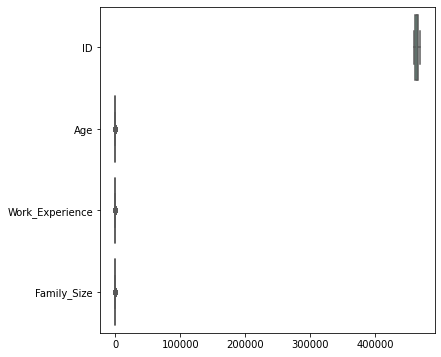

In [7]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=df_train, orient="h", palette="Set2")

In [8]:
print('train:\n', df_train.isnull().sum())
print('\ntest:\n', df_test.isnull().sum())

train:
 ID                   0
Gender               0
Ever_Married       135
Age                  0
Graduated           71
Profession           0
Work_Experience    794
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64

test:
 ID                   0
Gender               0
Ever_Married        47
Age                  0
Graduated           23
Profession           0
Work_Experience    257
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64


I will drop the missing values because there are not so many compared to the size of the dataset

In [9]:
df_train.drop_duplicates(inplace = True)
df_train.dropna(inplace = True)

df_test.drop_duplicates(inplace = True)
df_test.dropna(inplace = True)

In [10]:
X_train = df_train.drop(['Segmentation'], axis=1)
y_train = df_train['Segmentation']

X_test = df_test.drop(['Segmentation'], axis=1)
y_test = df_test['Segmentation']

In [11]:
df_test_numerical = df_test.select_dtypes(exclude=["object"])
df_test_categorical = df_test.select_dtypes(include=["object"])

   Gender Ever_Married Graduated  Profession Spending_Score  Var_1  \
0    Male           No        No  Healthcare            Low  Cat_4   
2  Female          Yes       Yes    Engineer            Low  Cat_6   
3    Male          Yes       Yes      Lawyer           High  Cat_6   
5    Male          Yes        No      Artist        Average  Cat_6   
6    Male           No       Yes  Healthcare            Low  Cat_6   

  Segmentation  
0            D  
2            B  
3            B  
5            C  
6            C  


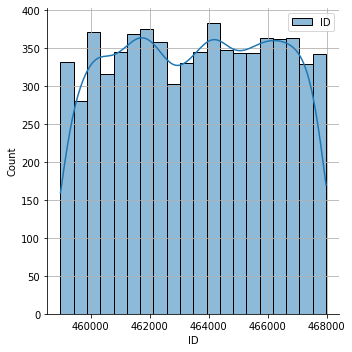

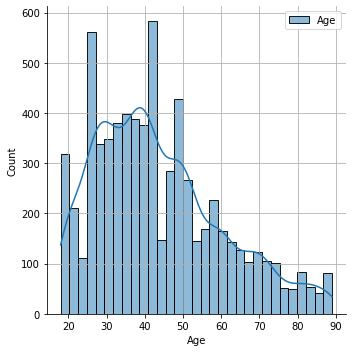

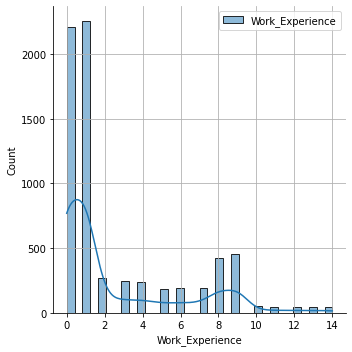

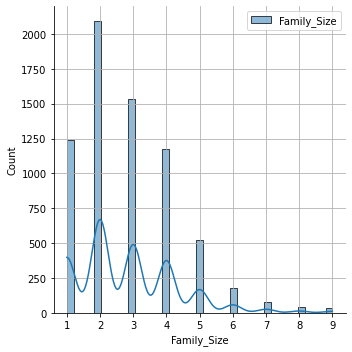

In [12]:
df_train_numerical = df_train.select_dtypes(exclude=["object"])
df_train_categorical = df_train.select_dtypes(include=["object"])
print(df_train_categorical.head())

for i, col in enumerate(list(df_train_numerical.columns)):
    sns.displot(df_train[col], kde= True, label = df_train[col].name)
    plt.grid()
    plt.legend(loc="upper right")
    plt.tight_layout()

I will `log transform` the feature `Work_Experience` because it's unbalanced

In [13]:
df_train['Work_Experience'] = np.log(df_train['Work_Experience'] + 1)
df_test['Work_Experience'] = np.log(df_test['Work_Experience'] + 1)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer


print('ISNULL SUM PER COLUMN:')
print(df_train.isnull().sum())


print('\nOUTLIER INDEXES PER COLUMN:')
outliers_array = []
for name in df_train_numerical.columns.to_list():
    Q1 = df_train[name].quantile(0.05)
    Q3 = df_train[name].quantile(0.95)
    IQR = Q3 - Q1
    print(f'{name} IQR = {IQR}')
    logical_index_outliers = (df_train[name] < (Q1 - 1.5 * IQR)) |(df_train[name] > (Q3 + 1.5 * IQR))
    positives = np.where(logical_index_outliers == True)[0]
    print(f'{name} Outlier indexes: {positives}')

to_be_removed = ['Segmentation']

# ordinal encoding:
dictionary={"Spending_Score": {"Low":0, "Average":1, "High":2}}
df_train.replace(dictionary, inplace=True)

print('\nISNULL SUM ON SEL. COL.:', df_train['Spending_Score'].isnull().sum())

ISNULL SUM PER COLUMN:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

OUTLIER INDEXES PER COLUMN:
ID IQR = 8066.200000000012
ID Outlier indexes: []
Age IQR = 55.0
Age Outlier indexes: []
Work_Experience IQR = 2.302585092994046
Work_Experience Outlier indexes: []
Family_Size IQR = 4.0
Family_Size Outlier indexes: []

ISNULL SUM ON SEL. COL.: 0


In [15]:
numeric_features = ['ID', 'Age', 'Work_Experience','Family_Size','Age']
# numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])
# categorical transformer
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('categorical', OneHotEncoder())])
preprocessor = ColumnTransformer(
    remainder = 'passthrough',
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features),
        ('remove', 'drop', to_be_removed)])

In [16]:
X_train = preprocessor.fit_transform(df_train)
y_train = df_train['Segmentation']

transforming in numerical columns

In [17]:
print('ISNULL SUM PER COLUMN:')
print(df_test.isnull().sum())

print('\nOUTLIER INDEXES PER COLUMN:')
outliers_array = []
for name in df_test_numerical.columns.to_list():
    Q1 = df_test[name].quantile(0.05)
    Q3 = df_test[name].quantile(0.95)
    IQR = Q3 - Q1
    print(f'{name} IQR = {IQR}')
    logical_index_outliers = (df_test[name] < (Q1 - 1.5 * IQR)) |(df_test[name] > (Q3 + 1.5 * IQR))
    positives = np.where(logical_index_outliers == True)[0]
    print(f'{name} Outlier indexes: {positives}')

to_be_removed = ['Segmentation']

# ordinal encoding:
dictionary={"Spending_Score": {"Low":0, "Average":1, "High":2}}
df_test.replace(dictionary, inplace=True)

print('\nISNULL SUM ON SEL. COL.:', df_test['Spending_Score'].isnull().sum())

ISNULL SUM PER COLUMN:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

OUTLIER INDEXES PER COLUMN:
ID IQR = 8134.900000000023
ID Outlier indexes: []
Age IQR = 57.0
Age Outlier indexes: []
Work_Experience IQR = 2.302585092994046
Work_Experience Outlier indexes: []
Family_Size IQR = 5.0
Family_Size Outlier indexes: []

ISNULL SUM ON SEL. COL.: 0


In [18]:
numeric_features = ['ID', 'Age', 'Work_Experience','Family_Size','Age']
# numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])
# categorical transformer
categorical_features = ['Gender', 'Ever_Married', 'Profession','Graduated', 'Spending_Score', 'Var_1', 'Segmentation']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('categorical', OneHotEncoder())])
preprocessor = ColumnTransformer(
    remainder = 'passthrough',
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features),
        ('remove', 'drop', to_be_removed)])

In [19]:
X_test = preprocessor.fit_transform(df_test)
y_test = df_test['Segmentation']

No outliers to drop

scaling the data

In [20]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)

In [21]:
transformer = RobustScaler().fit(X_test)
X_test = transformer.transform(X_test)

## (2) Train a **Softmax Regression** model able to predict the Segmentation class.
* **(a)** Perform features pre-processing if necessary. Discuss your choices and the performed actions.
* **(b)** Train a regularized model by applying $\ell_2$ regularization (default regularization when you perform multinominal LogisticRegression on sklearn): tune the hyperparameter $C$ in order to optimize the generalization performances of the model. What happens if you increase the value of $C$ ?
* **(c)** Evaluate the trained model on the provided test set: produce a confusion matrix comparing the true target test values to the predicted target values; calculate Precision, Recall and f-score for each class. Discuss the obtained results.


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

In [39]:
y_pred = softmax_reg.predict(X_test)

In [40]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       716
           B       1.00      1.00      1.00       471
           C       1.00      1.00      1.00       396
           D       1.00      1.00      1.00       656

    accuracy                           1.00      2239
   macro avg       1.00      1.00      1.00      2239
weighted avg       1.00      1.00      1.00      2239



In [59]:
print('test:\n', y_test, '\npred:', y_pred)

test:
 0       B
1       A
2       B
4       C
5       D
       ..
2551    D
2552    B
2553    A
2555    C
2556    A
Name: Segmentation, Length: 2239, dtype: object 
pred: ['B' 'A' 'B' ... 'A' 'C' 'A']


In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[716   0   0   0]
 [  0 471   0   0]
 [  0   0 396   0]
 [  0   0   0 656]]


Text(33.0, 0.5, 'Real')

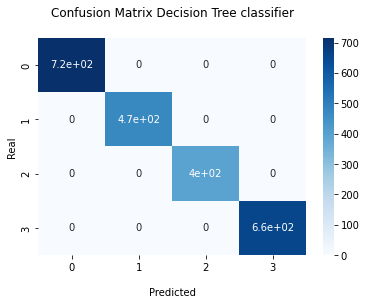

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix Decision Tree classifier\n')
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Real')

## (3) Train a **kNearestNeighbor** model able to predict the Segmentation class.
* **(a)** Perform features pre-processing if necessary. Discuss your choices and the
performed actions.
* **(b)** Train a k-Nearest Neighbour classifier on the training set, eventually tuning the model’s hyperparameters. Specify which hyperparameter requires a tuning procedure, and how does the model performs with different hyperpa- rameter values.
* **(c)** Evaluate the trained model on the provided test set: produce a confusion matrix comparing the true target test values to the predicted target values; calculate Precision, Recall and f-score for each class. Discuss the obtained results.

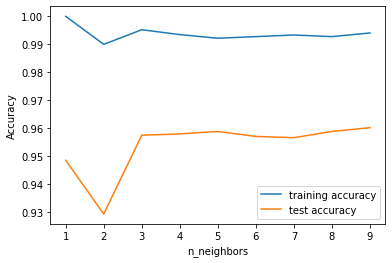

In [42]:
from sklearn.neighbors import KNeighborsClassifier 

training_accuracy = [] 
test_accuracy = []

# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:

  clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
  clf.fit(X_train, y_train)

  training_accuracy.append(clf.score(X_train, y_train)) 
  test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

with 8 neighbours we have the best generalization model

In [43]:
clf = KNeighborsClassifier(n_neighbors=8) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.98      0.99      0.99       716
           B       0.95      1.00      0.97       471
           C       0.88      0.99      0.93       396
           D       1.00      0.88      0.93       656

    accuracy                           0.96      2239
   macro avg       0.95      0.96      0.96      2239
weighted avg       0.96      0.96      0.96      2239



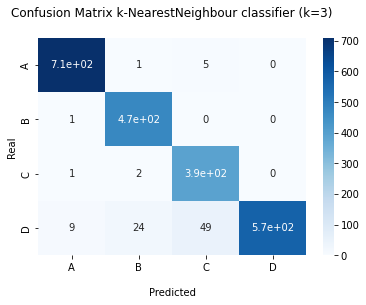

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix k-NearestNeighbour classifier (k=3)\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Real');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(y_train.drop_duplicates().sort_values())
ax.yaxis.set_ticklabels(y_train.drop_duplicates().sort_values())

## Display the visualization of the Confusion Matrix.
plt.show()

we see that classes C and D are not very well predicted, knn makes some errors

## (4) Train a **DecisionTree** model able to predict the Segmentation class.
* **(a)** Perform features pre-processing if necessary. Discuss your choices and the
performed actions.
* **(b)** Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for the DecisionTreeClassifier: make a choice on the hyperparameters you might tune and provide com- ments on you choice. Specify which hyperparameter might require a tuning procedure, and which is the effect of the tuning procedure on the final model.
* **(c)** Evaluate the trained model on the provided test set: produce a confusion matrix comparing the true target test values to the predicted target values; calculate Precision, Recall and f-score for each class. Discuss the obtained results.


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [47]:
grid_search_cv.best_params_

{'max_leaf_nodes': 4, 'min_samples_split': 2}

In [48]:
from sklearn.metrics import classification_report 

y_pred = grid_search_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       716
           B       1.00      1.00      1.00       471
           C       1.00      1.00      1.00       396
           D       1.00      1.00      1.00       656

    accuracy                           1.00      2239
   macro avg       1.00      1.00      1.00      2239
weighted avg       1.00      1.00      1.00      2239



By default, `GridSearchCV` trains the best model found on the whole training set. 

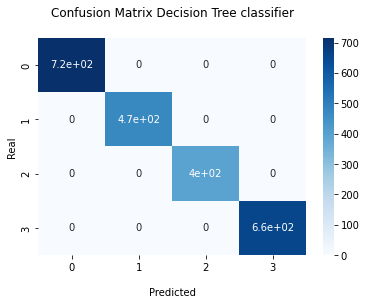

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix Decision Tree classifier\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Real');

## Display the visualization of the Confusion Matrix.
plt.show()

## (5) Train a **Random Forest** model able to predict the Segmentation class.
* **(a)** Perform features pre-processing if necessary. Discuss your choices and the
performed actions.
* **(b)** Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for the RandomForestClassifier: make a choice on the hyperparameters you might tune and provide com- ments on you choice. Specify which hyper-parameter might require a tuning procedure (concentrate on the hyperparameters related to the ensemble, and skip the ones discussed above and related to the DecisionTree).
* **(c)** Which are the 2 most important features for the trained model?
* **(d)** Evaluate the trained ensemble model on the provided test set: produce a confusion matrix comparing the true target test values to the predicted target values; calculate Precision, Recall and f-score for each class. Discuss the obtained results.

In [50]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=17, min_samples_split=2 , n_jobs=-1)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       716
           B       1.00      1.00      1.00       471
           C       1.00      1.00      1.00       396
           D       1.00      1.00      1.00       656

    accuracy                           1.00      2239
   macro avg       1.00      1.00      1.00      2239
weighted avg       1.00      1.00      1.00      2239



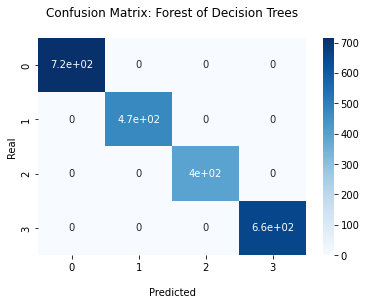

In [52]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix: Forest of Decision Trees\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Real');

## Display the visualization of the Confusion Matrix.
plt.show()

## (6) Compare the performances of the previously trained classifiers and discuss the results.

RF, DT and softmax regression seems the best ones at predicting the classes

## (7) **OPTIONAL**. Train a **Voting Classifier** model able to predict the Segmentation class.
* **(a)** Combine the models trained above into an ensemble, using a soft or hard
voting classifier.
* **(b)** Evaluate the trained model on the provided test set: produce a confusion matrix comparing the true target test values to the predicted target values; calculate Precision, Recall and f-score for each class. Discuss the obtained results.
* **(c)** How much better does the voting classifier perform compared to the individual classifiers?

## (8) **OPTIONAL**. Train various classifiers and include them in the Voting Classifier.
Train various classifiers (different from the ones trained above): such as Naive Bayes classifier, Extra-Trees classifier, AdaBoost classifier, GradientBoost classifier, XGBoost classifier. Include the trained models in the Voting Classifier trained above and evaluate again the model.